In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt

In [3]:
df=pd.read_csv("movies.csv")
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [4]:
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


In [5]:
df.corr()


,Audience score %,Profitability,Rotten Tomatoes %,Year
Audience score %,1.000000,0.066278,0.608333,-0.229926
Profitability,0.066278,1.000000,0.042428,-0.182130
Rotten Tomatoes %,0.608333,0.042428,1.000000,-0.093111
Year,-0.229926,-0.182130,-0.093111,1.000000


In [6]:
dt= pd.DataFrame(index=range(0,len(df)), columns=['Audience score %','Rotten Tomatoes %'])
for i in range(0,len(dt)):
  dt['Audience score %'][i]= df['Audience score %'][i]
  dt['Rotten Tomatoes %'][i]= df['Rotten Tomatoes %'] [i]

In [7]:
dt

,Audience score %,Rotten Tomatoes %
0,70,64
1,52,68
2,35,43
3,44,15
4,72,28
...,...,...
72,84,54
73,64,89
74,89,79
75,71,40


In [8]:
x = dt['Audience score %']
y= dt['Rotten Tomatoes %']
x=np.array(x)
x=x.reshape(-1,1)
y=np.array(y)
y=y.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:

pred = model.predict(x_test)
pred

array([[58.70663406],
       [51.26782559],
       [27.71159877],
       [56.22703123],
       [63.6658397 ],
       [45.06881853],
       [27.71159877],
       [30.1912016 ],
       [46.30861994],
       [56.22703123],
       [32.67080442],
       [79.78325805],
       [20.27279031],
       [71.10464817],
       [47.54842135],
       [30.1912016 ]])

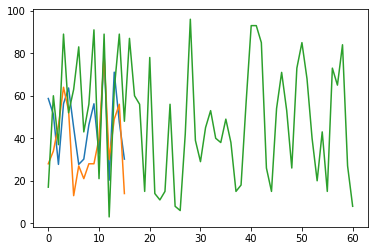

In [12]:
pyplt.plot(pred)
pyplt.plot(y_test)
pyplt.plot(y_train)